In [178]:
#importing necessary libraries
import pandas as pd
import numpy as np
import warnings

In [179]:
#to ignore warnings in code(if any) 
warnings.filterwarnings('ignore')

In [180]:
#providing column names
column_names=['user_id','item_id','rating','time_stamp']

In [181]:
#loading u.data
df=pd.read_csv('u.data',sep='\t',names=column_names)

In [182]:
#to know the number of unique users
df['user_id'].nunique()

943

In [183]:
#to know the number of unique movies
df['item_id'].nunique()

1682

In [184]:
#loading u.item
movies_title=pd.read_csv('u.item',sep='\|',header=None)

In [185]:
#retaining only the first two columns
movies_title=movies_title[[0,1]]

In [186]:
#column names of first two column 
movies_title.columns=['item_id','title']

In [187]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [188]:
#merging the two datasests
df=pd.merge(df,movies_title,on="item_id")

In [189]:
df.tail()

,user_id,item_id,rating,time_stamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [190]:
#importing neccessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
sns.set_style("white")

In [139]:
df.groupby("title").mean()["rating"].sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [192]:
df.groupby("title").count()["rating"].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [193]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [194]:
ratings["num of ratings"]=pd.DataFrame(df.groupby('title').count()['rating'])
ratings["num of ratings"]

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: num of ratings, Length: 1664, dtype: int64

In [195]:
ratings.sort_values(by="rating",ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


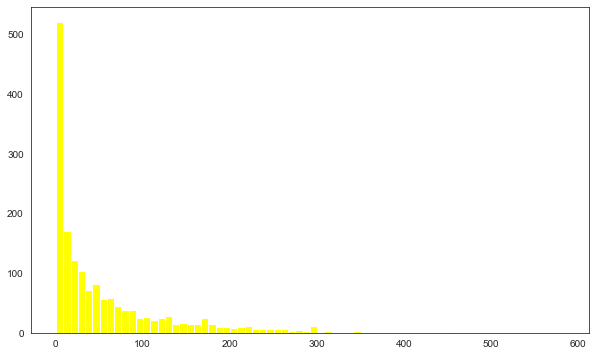

In [197]:
#histogram for number of ratings
plt.figure(figsize=(10,6))
plt.hist(ratings["num of ratings"],bins=70,color="yellow")
plt.show()

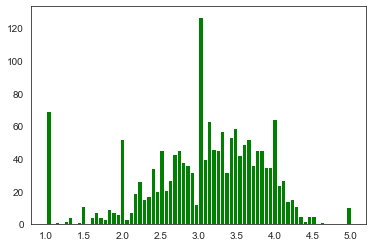

In [145]:
#histogram for ratings
plt.hist(ratings["rating"],bins=70,color="green")
plt.show()

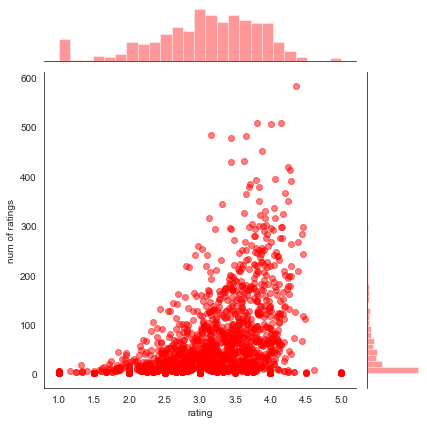

In [146]:
#jointplot for rating and num of ratings
sns.jointplot(x="rating",y="num of ratings",alpha=0.5,data=ratings,color="red")
plt.show()

In [147]:
df.head()

,user_id,item_id,rating,time_stamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [148]:
#creating a movie matrix
moviematrix=df.pivot_table(index="user_id",columns="title",values="rating")
moviematrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
ratings.sort_values("num of ratings",ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [150]:
starwars_user_ratings=moviematrix["Star Wars (1977)"]
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [151]:
#correlation of movie starwars with other movies
similar_to_starwars=moviematrix.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [152]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=["correlation"])
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [153]:
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [154]:
corr_starwars.sort_values(by="correlation",ascending=False).head(10)

,correlation
title,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Mondo (1996),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


In [155]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [157]:
corr_starwars.head(10)

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [159]:
corr_starwars[corr_starwars["num of ratings"]>100].sort_values("correlation",ascending=False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [198]:
#function for movie predictions
def Predict_movies(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=["correlation"])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num of ratings'])
    predictions=corr_movie[corr_movie["num of ratings"]>100].sort_values("correlation",ascending=False)
    return predictions    

In [200]:
#movies similar to titanic
predictions=Predict_movies("Titanic (1997)")
predictions.head()

,correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
